# Simple Tutorial on Using Linear Discriminant Analysis for Dimension Reduction in Python

I first learned this technique using Sebastian Raschka's article on LDA
http://sebastianraschka.com/Articles/2014_python_lda.html 

The YouTube tutorial from StatQuest was also incredibly helpful https://youtu.be/azXCzI57Yfc

### Importing the libraries and data

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import math
import seaborn as sns

%matplotlib inline

### Check out the data

In [97]:
# Load the Iris data into a dataframe
iris = load_iris()

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['class_label'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [98]:
# Check out the dataframe
data = data.drop(['sepal length (cm)', 'petal length (cm)'], axis = 1)
data.head()

,sepal width (cm),petal width (cm),class_label
0,3.5,0.2,0.0
1,3.0,0.2,0.0
2,3.2,0.2,0.0
3,3.1,0.2,0.0
4,3.6,0.2,0.0


In [99]:
feature_dict = {i:label for i,label in zip(range(2), ('sepal width in cm','petal width in cm'))}

label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

In [100]:
X = data[['sepal width (cm)', 'petal width (cm)']].values
y = data['class_label'].values

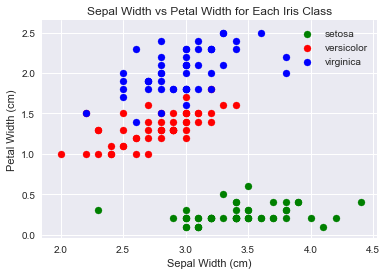

In [101]:
# plot petal length vs petal width

setosa = data[data['class_label'] == 0]
versicolor = data[data['class_label'] == 1]
virginica = data[data['class_label'] == 2]

_ = plt.scatter(setosa['sepal width (cm)'], y = setosa['petal width (cm)'], marker='o', c = 'green', label = 'setosa')
_ = plt.scatter(versicolor['sepal width (cm)'], y = versicolor['petal width (cm)'], marker='o', c = 'red', label = 'versicolor')
_ = plt.scatter(virginica['sepal width (cm)'], y = virginica['petal width (cm)'], marker='o', c = 'blue', label = 'virginica')
_ = plt.title('Sepal Width vs Petal Width for Each Iris Class')
_ = plt.xlabel('Sepal Width (cm)')
_ = plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

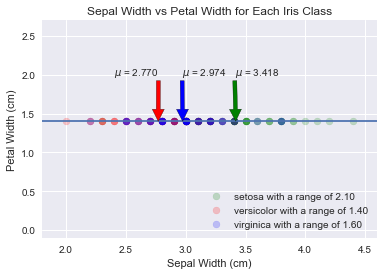

In [102]:
# Example of a bad subspace (line)

setosa = data[data['class_label'] == 0]
versicolor = data[data['class_label'] == 1]
virginica = data[data['class_label'] == 2]

setosa_mean = setosa['sepal width (cm)'].mean()
versicolor_mean = versicolor['sepal width (cm)'].mean()
virginica_mean = virginica['sepal width (cm)'].mean()

setosa_range = setosa['sepal width (cm)'].max() - setosa['sepal width (cm)'].min()
versicolor_range = versicolor['sepal width (cm)'].max() - versicolor['sepal width (cm)'].min()
virginica_range = virginica['sepal width (cm)'].max() - virginica['sepal width (cm)'].min()

def line(formula, x_range):  
    x = np.array(x_range)
    y = formula(x)
    _ = plt.plot(x, y)   

def my_formula(x):
    return x * 0 + 1.4

line(my_formula, range(0, 7))

_ = plt.scatter(setosa['sepal width (cm)'], my_formula(setosa['sepal width (cm)']), marker='o', 
                c = 'green', label = 'setosa with a range of %.2f' % setosa_range, alpha = 0.2)
_ = plt.scatter(versicolor['sepal width (cm)'], my_formula(versicolor['sepal width (cm)']), marker='o', 
                c = 'red', label = 'versicolor with a range of %.2f' % versicolor_range, alpha = 0.2)
_ = plt.scatter(virginica['sepal width (cm)'], my_formula(virginica['sepal width (cm)']), marker='o', 
                c = 'blue', label = 'virginica with a range of %.2f' % virginica_range, alpha = 0.2)
_ = plt.title('Sepal Width vs Petal Width for Each Iris Class')
_ = plt.xlabel('Sepal Width (cm)')
_ = plt.ylabel('Petal Width (cm)')
plt.axis([1.8, 4.6, -0.1, 2.7])
plt.legend(loc = 4)


plt.annotate('$\mu$ = %.3f' % setosa_mean, xy = (setosa_mean, 1.4), xytext = (3.41, 2.0), 
             arrowprops = dict(facecolor='green'))
plt.annotate('$\mu$ = %.3f' % versicolor_mean, xy = (versicolor_mean, 1.4), xytext = (2.4, 2.0), 
             arrowprops = dict(facecolor='red'))
plt.annotate('$\mu$ = %.3f' % virginica_mean, xy = (virginica_mean, 1.4), xytext = (2.97, 2.0), 
             arrowprops = dict(facecolor='blue'))

plt.show()

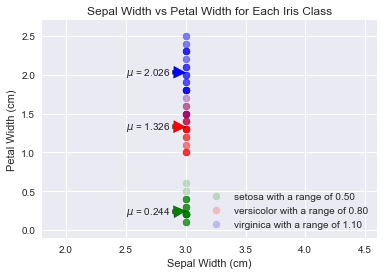

In [103]:
# Example of a better subspace (line)

setosa = data[data['class_label'] == 0]
versicolor = data[data['class_label'] == 1]
virginica = data[data['class_label'] == 2]

setosa_mean = setosa['petal width (cm)'].mean()
versicolor_mean = versicolor['petal width (cm)'].mean()
virginica_mean = virginica['petal width (cm)'].mean()

setosa_range = setosa['petal width (cm)'].max() - setosa['petal width (cm)'].min()
versicolor_range = versicolor['petal width (cm)'].max() - versicolor['petal width (cm)'].min()
virginica_range = virginica['petal width (cm)'].max() - virginica['petal width (cm)'].min()


def line(formula, y_range):  
    x = np.array(y_range)
    y = formula(x)
    _ = plt.plot(x, y)   

def my_formula(x):
    return 0 * x + 3

line(my_formula, range(0, 3))

_ = plt.scatter(my_formula(setosa['petal width (cm)']), setosa['petal width (cm)'], marker='o', 
                c = 'green', label = 'setosa with a range of %.2f' % setosa_range, alpha = 0.2)
_ = plt.scatter(my_formula(versicolor['petal width (cm)']), versicolor['petal width (cm)'], marker='o', 
                c = 'red', label = 'versicolor with a range of %.2f' % versicolor_range, alpha = 0.2)
_ = plt.scatter(my_formula(virginica['petal width (cm)']), virginica['petal width (cm)'], marker='o', 
                c = 'blue', label = 'virginica with a range of %.2f' % virginica_range, alpha = 0.2)
_ = plt.title('Sepal Width vs Petal Width for Each Iris Class')
_ = plt.xlabel('Sepal Width (cm)')
_ = plt.ylabel('Petal Width (cm)')
plt.axis([1.8, 4.6, -0.1, 2.7])
plt.legend(loc = 4)


plt.annotate('$\mu$ = %.3f' % setosa_mean, xy = (3.0, setosa_mean), xytext = (2.5, 0.2), 
             arrowprops = dict(facecolor='green'))
plt.annotate('$\mu$ = %.3f' % versicolor_mean, xy = (3.0, versicolor_mean), xytext = (2.5, 1.3), 
             arrowprops = dict(facecolor='red'))
plt.annotate('$\mu$ = %.3f' % virginica_mean, xy = (3.0, virginica_mean), xytext = (2.5, 2.0), 
             arrowprops = dict(facecolor='blue'))

plt.show()

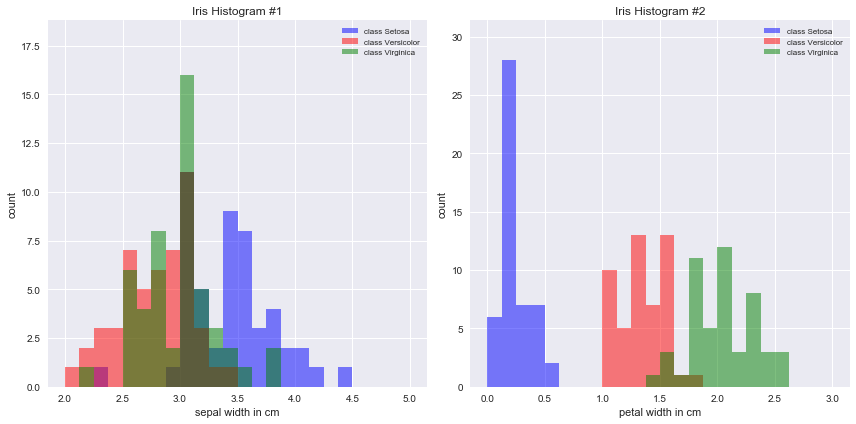

In [104]:
# Visualize the data in histograms

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

for ax, cnt in zip(axes.ravel(), range(2)):
    
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)
    
    # plotting the histograms
    for lab, col in zip(range(0,3), ('blue', 'red', 'green')):
        ax.hist(X[y == lab, cnt],
                    color = col,
                    label = 'class %s' %label_dict[lab],
                    bins = bins,
                    alpha = 0.5)
    ylims = ax.get_ylim()
    
    # plot annotation
    leg = ax.legend(loc = 'upper right', fancybox = True, fontsize = 8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims) + 2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_ylabel('count')
    ax.set_title('Iris Histogram #%s' %str(cnt+1))
    
    # hide axis ticks
    ax.tick_params(axis = 'both', which = 'both', bottom = 'off', 
                  top = 'off', labelbottom = 'on', left = 'off',
                  right = 'off', labelleft = 'on')
    
    # remove axis spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig.tight_layout()

plt.show()

## LDA in Five Steps

1. Computing the d-dimensional mean vectors
2. Computing the Scatter Matrices
3. Solving the generalized eigenvalue problem to obtain the linear discriminants
4. Selecting linear discrimminants for the new feature subspace
5. Choosing k eigenvectors with the largest eigenvalues

### Step 1: Computing the d-dimensional mean vectors

Compute the mean vectors of the three different flower classes

In [105]:
np.set_printoptions(precision = 4)

mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[y == cl], axis = 0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl]))

Mean Vector class 0: [ 3.418  0.244]

Mean Vector class 1: [ 2.77   1.326]

Mean Vector class 2: [ 2.974  2.026]



In [106]:
# finding the central point

sepal_mean = np.mean([3.418, 2.77, 2.974])
petal_mean = np.mean([0.244, 1.326, 2.026])
print('The central point (overall mean) is: (%.3f, %.3f)' % (sepal_mean, petal_mean))

The central point (overall mean) is: (3.054, 1.199)


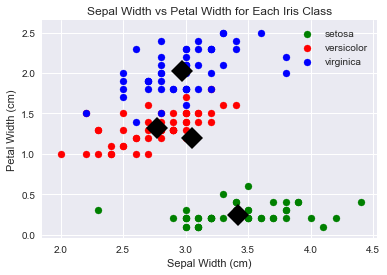

In [107]:
# plot petal length vs petal width
# plot the central point and the class means

setosa = data[data['class_label'] == 0]
versicolor = data[data['class_label'] == 1]
virginica = data[data['class_label'] == 2]

_ = plt.scatter(setosa['sepal width (cm)'], y = setosa['petal width (cm)'], marker='o', c = 'green', label = 'setosa')
_ = plt.scatter(versicolor['sepal width (cm)'], y = versicolor['petal width (cm)'], marker='o', c = 'red', label = 'versicolor')
_ = plt.scatter(virginica['sepal width (cm)'], y = virginica['petal width (cm)'], marker='o', c = 'blue', label = 'virginica')
_ = plt.title('Sepal Width vs Petal Width for Each Iris Class')
_ = plt.xlabel('Sepal Width (cm)')
_ = plt.ylabel('Petal Width (cm)')
plt.legend()

plt.plot(3.054, 1.199, marker = 'D', color = 'black', markersize = 15)   # Central point 
plt.plot(3.418, 0.244, marker = 'D', color = 'black', markersize = 15)    # Setosa Mean
plt.plot(2.770, 1.326, marker = 'D', color = 'black', markersize = 15)    # Versicolor Mean
plt.plot(2.974, 2.026, marker = 'D', color = 'black', markersize = 15)    # Virginica Mean


plt.show()

### Step 2: Computing the Scatter Matrices

Compute the two 4x4-dimensional matrices: the within-class and the between-class scatter matrix.

In [108]:
# Within-Class Scatter Matrix
# Calculating the covariance

S_W = np.zeros((2,2))
for cl, mv in zip(range(0,3), mean_vectors):
    # empty class covariance matrix
    class_sc_mat = np.zeros((2,2)) 
    
    for row in X[y == cl]:
        row, mv = row.reshape(2,1), mv.reshape(2,1)    
        # calculates the covariance of the features for within a class
        class_sc_mat += (row - mv).dot((row - mv).T)
    
    # add up the 3 covariance matrices
    S_W += class_sc_mat                                

print('Within-Class Scatter matrix:\n', S_W)

Within-Class Scatter matrix:
 [[ 17.035    4.9132]
 [  4.9132   6.1756]]


In [109]:
# Between-Class Scatter Matrix

# The mean sepal width and mean petal width
# AKA the Central Point
overall_mean = np.mean(X, axis = 0)

# empty scatter matrix
S_B = np.zeros((2,2))

for i, mean_vec in enumerate(mean_vectors):
    n = X[y == i, :].shape[0]
    mean_vec = mean_vec.reshape(2,1)            
    overall_mean = overall_mean.reshape(2,1) 
    
    # add up the differences of the class means and the overall mean
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('Between-Class Scatter Matrix:\n', S_B)

Between-Class Scatter Matrix:
 [[ 10.9776 -22.4924]
 [-22.4924  80.6041]]


### Step 3: Solving the generalized eigenvalue problem for the matrix S_W(-1)* S_B

Finding linear discriminants

In [110]:
# The transformation matrix W
W = np.linalg.inv(S_W).dot(S_B)
print('W =\n', W)

# NumPy does the eigenvector and eigenvalue calculations for us
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(2,1)
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

W =
 [[  2.1996  -6.599 ]
 [ -5.3921  18.3021]]

Eigenvector 1: 
[[-0.9583]
 [-0.2859]]
Eigenvalue 1: 2.31e-01

Eigenvector 2: 
[[ 0.343 ]
 [-0.9393]]
Eigenvalue 2: 2.03e+01


In [111]:
# Checking the eigenvector-eigenvalue calculation

for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(2,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                        eig_vals[i] * eigv,
                                        decimal = 6, err_msg = '', verbose = True)
print('ok')

ok


### Step 4: Sorting the eigenvectors by decreasing eigenvalues

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data -- therefore, we want to drop those

In [139]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key = lambda k: k[0], reverse = True)

# Confirm the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

20.2710837471
0.230604546972


In [140]:
# Express the 'explained variance' as percentage

print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('Eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

Eigenvalue 1: 98.88%
Eigenvalue 2: 1.12%


In [141]:
print(eig_pairs)

[(20.271083747063727, array([ 0.343 , -0.9393])), (0.23060454697217381, array([-0.9583, -0.2859]))]


In [142]:
# Choosing k eigenvectors with the largest eigenvalues
# Constructing a 2x2 eigenvector matrix based on the most informative eigenpair
# Therefore (not)reducing the original 2-dimensional feature space into a better 2-dimensional feature subspace

V = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print('Matrix V:\n', V.real)

Matrix V:
 [[ 0.343  -0.9583]
 [-0.9393 -0.2859]]


## Transforming the samples onto the new subspace

Use the 4x2-dimensional matrix V to transform the samples using Y = X x V

In [143]:
X_lda = X.dot(V)

In [144]:
assert X_lda.shape == (150,2), 'The matrix is not 150x2 dimensional.'

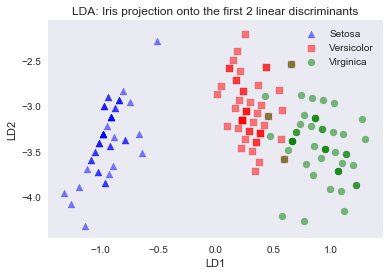

In [161]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label] * -1,
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

## LDA with scikit-learn 

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components = 2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [163]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1,
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

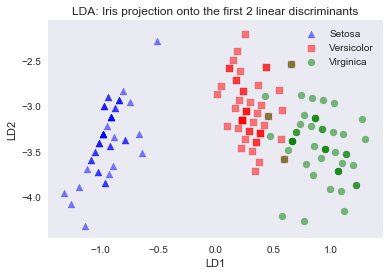

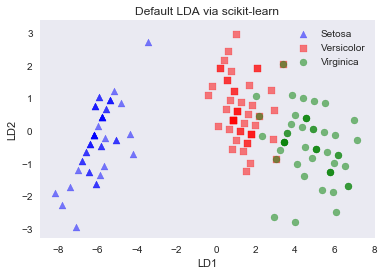

In [164]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')